<a href="https://colab.research.google.com/github/TaylorShiehUSI/Github-Colab-test/blob/main/20220818_2230%20by%20liner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# 下載資料套件
import requests as r

# 資料處理套件
from lxml import etree
import json
from datetime import datetime, date
import pandas as pd

# 財經套件
# import yfinance as yf

# 畫圖套件
import plotly.graph_objects as go

In [3]:
## down load stock data
def get_tw_stock_data(start_year, start_month, end_year, end_month, stock_code):
    start_date = str(date(start_year, start_month, 1))
    end_date = str(date(end_year, end_month, 1))
    month_list = pd.date_range(start_date, end_date, freq='MS').strftime("%Y%m%d").tolist()
    
    df = pd.DataFrame()
    for month in month_list:
        url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+ month + "&stockNo=" + str(stock_code)
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)
        
    # 資料轉型
    for col in [0, 1, 2, 3, 4, 5, 6, 8]:
        for row in range(df.shape[0]):
            # 把"日期"從字串(string)換成時間(datetime)，並將民國年換成西元年
            if col == 0:
                day = df.iloc[row,0].split('/')
                df.iloc[row, 0] = datetime(int(day[0]) + 1911, int(day[1]), int(day[2]))  
            # 把"開盤價", "最高價", "最低價", "收盤價"帶有逗號的字串(string)換成浮點數(float) 
            elif col != 0:
                df.iloc[row, col] = float(df.iloc[row,col].replace(',', ''))
    
    df.columns = ['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數']
    return df

In [4]:
##  input Start - End , and stock index
stock_df = get_tw_stock_data(start_year = 2021, 
                start_month = 1, 
                end_year = 2022, 
                end_month = 8, 
                stock_code = 2330)
stock_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2021-01-04 00:00:00,39489959.0,21127581248.0,530.0,540.0,528.0,536.0,+6.00,33316.0
1,2021-01-05 00:00:00,34839391.0,18761831567.0,536.0,542.0,535.0,542.0,+6.00,28512.0
2,2021-01-06 00:00:00,55614434.0,30572783229.0,555.0,555.0,541.0,549.0,+7.00,55462.0
3,2021-01-07 00:00:00,53392763.0,30018630685.0,554.0,570.0,553.0,565.0,+16.00,47905.0
4,2021-01-08 00:00:00,62957148.0,36339702855.0,580.0,580.0,571.0,580.0,+15.00,56426.0
...,...,...,...,...,...,...,...,...,...
391,2022-08-12 00:00:00,21343450.0,11016097043.0,515.0,518.0,514.0,517.0,+3.00,21701.0
392,2022-08-15 00:00:00,22519886.0,11755494600.0,520.0,524.0,519.0,523.0,+6.00,27372.0
393,2022-08-16 00:00:00,21234122.0,11141160337.0,526.0,526.0,523.0,525.0,+2.00,20628.0
394,2022-08-17 00:00:00,28461939.0,14943047011.0,524.0,527.0,521.0,527.0,+2.00,26466.0


In [93]:
stock_df.to_csv('2230.csv',encoding='utf-8_sig')

In [94]:
## Data Processing // Add is_up
import numpy as np
stock_df['高低差'] = (stock_df['最高價'] - stock_df['最低價']).astype('int')
stock_df['漲跌價差'] = (stock_df['收盤價'] - stock_df['開盤價']).astype('int')
stock_df['單筆股數'] = (stock_df['成交股數']/stock_df['成交筆數']).astype('int')
stock_df['is_up'] = (stock_df['開盤價'].shift(-1) - stock_df['收盤價'] >0).astype('int')

def one_hot(targets, nb_classes):
    return np.eye(nb_classes)[np.array(targets).reshape(-1)]
y_data = one_hot(stock_df['is_up'], 2)
stock_df.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,高低差,單筆股數,is_up
0,2021-01-04 00:00:00,39489959.0,21127581248.0,530.0,540.0,528.0,536.0,6,33316.0,12,1185,0
1,2021-01-05 00:00:00,34839391.0,18761831567.0,536.0,542.0,535.0,542.0,6,28512.0,7,1221,1
2,2021-01-06 00:00:00,55614434.0,30572783229.0,555.0,555.0,541.0,549.0,-6,55462.0,14,1002,1
3,2021-01-07 00:00:00,53392763.0,30018630685.0,554.0,570.0,553.0,565.0,11,47905.0,17,1114,1
4,2021-01-08 00:00:00,62957148.0,36339702855.0,580.0,580.0,571.0,580.0,0,56426.0,9,1115,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38989 missing from current font.
  

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_te

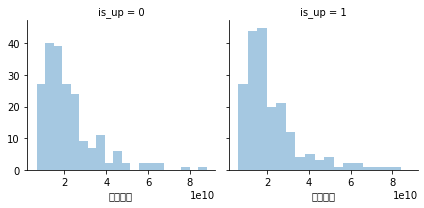

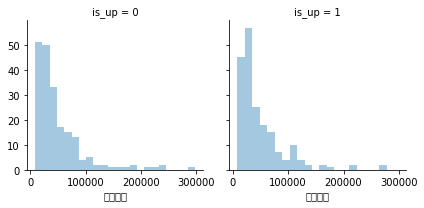

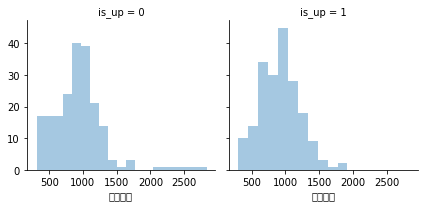

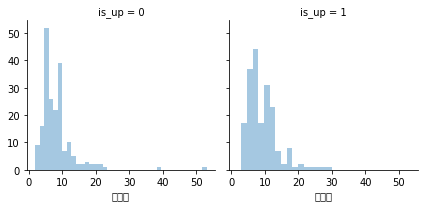

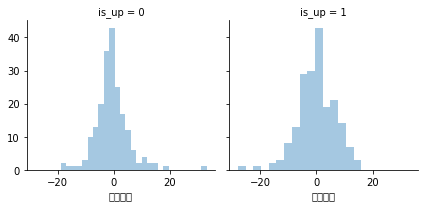

In [95]:
# Stock Data Exploring
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

g = sns.FacetGrid(stock_df, col='is_up')
g.map(sns.distplot, '成交金額',kde=False )

g = sns.FacetGrid(stock_df, col='is_up')
g.map(sns.distplot, '成交筆數',kde=False )

g = sns.FacetGrid(stock_df, col='is_up')
g.map(sns.distplot, '單筆股數',kde=False )

g = sns.FacetGrid(stock_df, col='is_up')
g.map(sns.distplot, '高低差', kde=False)

g = sns.FacetGrid(stock_df, col='is_up')
g.map(sns.distplot, '漲跌價差', kde=False)


In [96]:
X_data = stock_df.drop(['日期','is_up'], axis=1)
X_data.head()
X_data.columns

Index(['成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數', '高低差',
       '單筆股數'],
      dtype='object')

In [105]:
## Normalized


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(scaled, columns=X_data.columns)
#print(X_data)
X_data.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,高低差,單筆股數
0,0.080186,-0.071667,-1.153338,-1.019302,-1.096278,-1.012538,1.013817,-0.379426,0.621208,0.741872
1,-0.134087,-0.247813,-1.019090,-0.974565,-0.938529,-0.878155,1.013817,-0.487942,-0.380414,0.845271
2,0.823115,0.631591,-0.593973,-0.683771,-0.803315,-0.721375,-0.906334,0.120824,1.021857,0.216262
3,0.720752,0.590331,-0.616347,-0.348240,-0.532888,-0.363020,1.813879,-0.049879,1.622830,0.537947
4,1.161428,1.060977,-0.034607,-0.124553,-0.127247,-0.027063,0.053742,0.142600,0.020235,0.540819


In [112]:
from keras.engine.training import Model
## train the model, with preparing the data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras import backend as K

# # keep one hot Encoding in y for Cross Table
y_data_cross = y_data
y_data_cross = np.argmax(y_data_cross,axis=1)
# print(y_test_cross)
# # print(y_test_cross)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_cross, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = LinearDiscriminantAnalysis(n_components=1)
model = model.fit(X_train,y_train).predict(X_test)

print(np.array([model,y_test]))
print('正确率：',str(model.score(X_test,y_test)))


[[1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1
  0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1
  1 1 1 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1
  0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0
  0 0 0 1 0 0 1 0]]


AttributeError: ignored

In [113]:
from keras.engine.training import Model
## train the model, with preparing the data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from keras import backend as K

# # keep one hot Encoding in y for Cross Table
y_data_cross = y_data
y_data_cross = np.argmax(y_data_cross,axis=1)
# print(y_test_cross)
# # print(y_test_cross)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_cross, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = linear_model.LogisticRegression()
model = model.fit(X_train,y_train).predict(X_test)

print(np.array([model,y_test]))
print('正确率：',str(model.score(X_test,y_test)))

[[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
  1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1
  1 0 0 0 0 0 1 0]
 [0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1
  0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1
  1 0 0 1 1 0 0 0]]


AttributeError: ignored

In [114]:
from keras.engine.training import Model
## train the model, with preparing the data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from keras import backend as K

# # keep one hot Encoding in y for Cross Table
y_data_cross = y_data
y_data_cross = np.argmax(y_data_cross,axis=1)
# print(y_test_cross)
# # print(y_test_cross)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_cross, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = svm.SVR(C=6, kernel='poly', degree=3, gamma='auto')
model = model.fit(X_train,y_train).predict(X_test)

print(np.array([model,y_test]))
print('正确率：',str(model.score(X_test,y_test)))

[[ 0.46730545  0.21625584  0.21821975  0.05239759  0.50522224  0.31558072
   2.36293501  0.14865341  0.28157757  0.84435304  0.63128114  0.23376346
   0.09461982  0.1674898   0.10227562  0.26540715 -0.92695683 -0.09642816
   0.13397386  0.19855643  0.42273654  0.07572131  0.13435324  0.05269265
   3.21372803  0.18130085  0.31097938  0.42015305  0.37603648  0.1969645
  -0.61773978  0.22981748  0.19072236  0.33342625  0.26110552  0.30807592
   0.06281326  0.12986945  0.86283596  0.1044455   0.27453826  0.30556324
  -0.03851316  0.28833728  3.24532094  0.4046135   0.03332026  0.2802459
   1.06404532  0.21649754  0.30013593  0.26288404  0.26468776  0.73744577
   0.30016     0.36076039  0.30818367 -0.05599751  0.47438261  0.20633735
   2.42697254  0.1875002   0.37351202  0.20483668  0.26673882  0.27519384
   0.28925521 23.15613139  0.77297046  1.22278558  0.50544018  0.06851383
   0.22595165  0.76621326  0.38066382  0.28763114  0.2877048   0.45565324
   0.4585056   2.31620822]
 [ 0.        

AttributeError: ignored